# Iris Dataset Analysis

## Comparison of basic implementations of machine learning algorithms on the Iris Dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/iris)

### Initial EDA

In [1]:
# Importing Necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
# Reading in the data set inputing the column names

data = pd.read_csv('iris.csv', names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'])

In [3]:
# Initial inspection

display(data.head())

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Target variable (y) labels

print(data['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
# Further inspection of dataset, check for NaN values

print(data.info())
print('\n')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500

In [6]:
# No NaN values present, no dataset editing needed

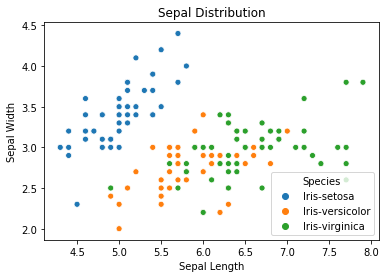

In [7]:
# Visual EDA of the relationship between sepal width and length in relation to classes

sns.scatterplot('Sepal Length', 'Sepal Width', data=data, hue='Species')
plt.title('Sepal Distribution')
plt.show()

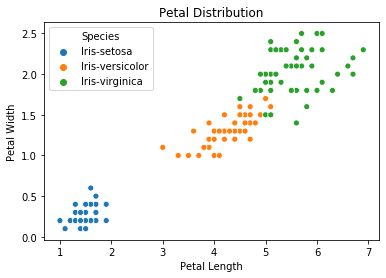

In [8]:
# Visual EDA of the relationshop between petal width and length in relation to classes

sns.scatterplot('Petal Length', 'Petal Width', data=data, hue='Species')
plt.title('Petal Distribution')
plt.show()

In [9]:
# Evidently, the petal data is showing strong clusters for seperating the classes of flower

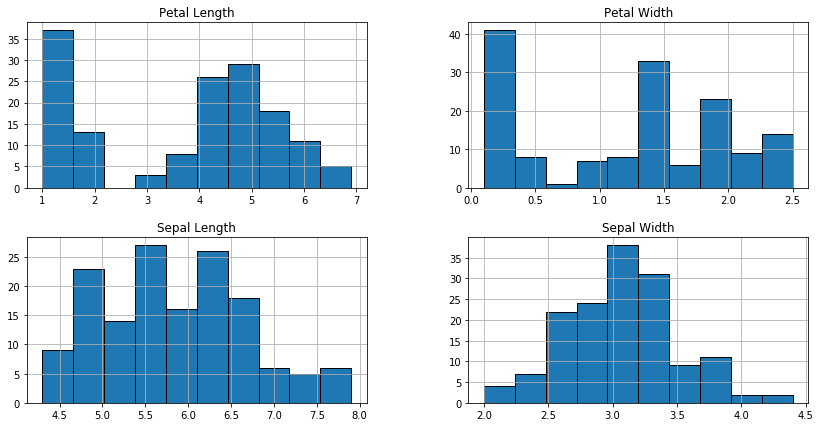

In [10]:
# Length and width distribution exploration

data.hist(edgecolor='black')
fig=plt.gcf()
fig.set_size_inches(14,7)
plt.show()

### Creating training and testing sets

In [11]:
# Seperation of dataset into training and testing sets

X = data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [12]:
# Checking of sets 

display(X_train.head())
display(y_train.head())
print('Number of instances in training: ' + str(len(X_train)))
print('\n')
display(X_test.head())
display(y_test.head())
print('Number of instances in testing: ' + str(len(X_test)))

,Sepal Length,Sepal Width,Petal Length,Petal Width
10,5.4,3.7,1.5,0.2
46,5.1,3.8,1.6,0.2
36,5.5,3.5,1.3,0.2
124,6.7,3.3,5.7,2.1
7,5.0,3.4,1.5,0.2


10        Iris-setosa
46        Iris-setosa
36        Iris-setosa
124    Iris-virginica
7         Iris-setosa
Name: Species, dtype: object

Number of instances in training: 105




,Sepal Length,Sepal Width,Petal Length,Petal Width
40,5.0,3.5,1.3,0.3
146,6.3,2.5,5.0,1.9
38,4.4,3.0,1.3,0.2
99,5.7,2.8,4.1,1.3
143,6.8,3.2,5.9,2.3


40         Iris-setosa
146     Iris-virginica
38         Iris-setosa
99     Iris-versicolor
143     Iris-virginica
Name: Species, dtype: object

Number of instances in testing: 45


### Logistic Regression

In [13]:
# Implementation of LR model

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression Accuracy: ' + str(accuracy_score(y_pred, y_test)))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Logistic Regression Accuracy: 0.9777777777777777


[[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [14]:
# Tuning of LR model

tol = [0.0001, 0.001, 0.01, 1]
max_iter = [150, 200, 300, 400]
param_grid = dict(tol=tol, max_iter=max_iter)

grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

grid_model_result = grid_model.fit(X_train, y_train)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_

print('The best accuracy score was %f , using paramaters: %s' % (best_score, best_params) )

The best accuracy score was 0.980952 , using paramaters: {'max_iter': 150, 'tol': 1}


### K-Neighbors

In [15]:
# Implementation of K-Neighbors model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('KNeighbors Accuracy :' + str(accuracy_score(y_pred, y_test)))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

KNeighbors Accuracy :0.9777777777777777


[[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [16]:
# Tuning of K-Neighbors model

n_neighbors = [3,5,7,9,10]
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=n_neighbors, weights=weights)

grid_model1 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

grid_model1_result = grid_model1.fit(X_train, y_train)

best_score1, best_params1 = grid_model1_result.best_score_, grid_model1_result.best_params_

print('The best accuracy score was %f , using paramaters: %s' % (best_score1, best_params1) )

The best accuracy score was 0.980952 , using paramaters: {'n_neighbors': 3, 'weights': 'uniform'}


### Decision Tree 

In [17]:
# Implementation of DT model

dt = DecisionTreeClassifier(random_state=12)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Decision Tree Accuracy: ' + str(accuracy_score(y_pred, y_test)))

Decision Tree Accuracy: 0.9555555555555556


### Deeper delve into feature importance

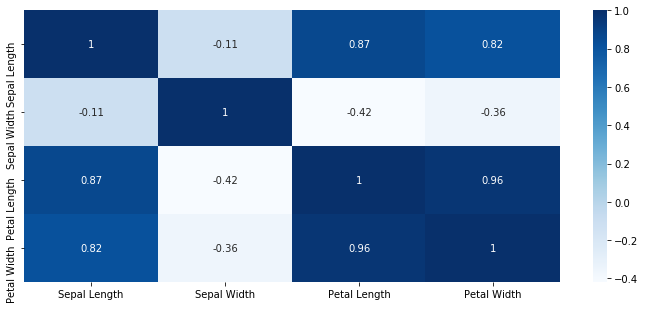

In [18]:
# Heatmap to view feature relationship importance

plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

Evidently, there is a high correlation between petal width and length,
but not the case for sepal width and sepal length,
we will now attempt to use purely petal data for the algortihms.

### Using ML models purely on the petal data

In [19]:
# Separation of petal data

petal = data[['Petal Length', 'Petal Width', 'Species']]

p_train, p_test = train_test_split(petal, test_size=0.3, random_state=0)

X_train_p = p_train[['Petal Length', 'Petal Width']]
y_train_p = p_train['Species']
X_test_p = p_test[['Petal Length', 'Petal Width']]
y_test_p = p_test['Species']

In [20]:
# Log regression

logreg_p = LogisticRegression()
logreg_p.fit(X_train_p, y_train_p)
y_pred_p = logreg_p.predict(X_test_p)
print('Accuracy of LogReg using petal data: ' + str(accuracy_score(y_pred_p, y_test_p)))

Accuracy of LogReg using petal data: 0.9777777777777777


In [21]:
# KNN

knn_p = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_p.fit(X_train_p, y_train_p)
y_pred_p = knn_p.predict(X_test_p)

print('KNeighbors Accuracy :' + str(accuracy_score(y_pred_p, y_test_p)))

KNeighbors Accuracy :0.9777777777777777


In [22]:
# DecisionTree

dt_p = DecisionTreeClassifier()
dt_p.fit(X_train_p, y_train_p)
y_pred_p = dt_p.predict(X_test_p)

print('DecisionTree Accuracy: ' + str(accuracy_score(y_pred_p, y_test_p)))

DecisionTree Accuracy: 0.9555555555555556


# Conclusion:

## The KNN and LogReg algorithms perform slightly better on this dataset than a decision tree model. This is not a surprising result from the KNN method as we viewed clear clusters in the visual EDA at the beginning. 
## Furthermore, through trials, we have found that the petal data holds the key features for determining a flower species label as we achieve similar levels of accuracy. Hence it is preferable to use purely the label features in order to achieve results at a lower computational level.